# 📊 Data-Driven Insights into Stroke Risk Analysis Using Healthcare Data Using Statistical Analysis
NAME : KEERTHI N

REGISTRATION NO:2411021240024

GITHUB LINK:https://github.com/keerthi19hub/Stroke-Risk-Analysis-SDS-

# 📚 Table of Contents
Welcome to the project notebook! Below is the structured flow of analysis covered in this project.

1. 📘 [Project Title and Info](#project-title-and-info)
2. 🧾 [Project Overview](#project-overview)
3. 🎯 [Project Goal](#project-goal)
4. 🚧 [Challenges Faced](#challenges-faced)
5. 📦 [Import Libraries & Load Dataset](#import-libraries--load-dataset)
6. 🧹 [Data Preprocessing](#data-preprocessing)
7. 📊 [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
8. 🔍 [Univariate and Multivariate Analysis](#univariate-and-multivariate-analysis)
9. 🎲 [Probability & Hypothesis Testing](#probability--hypothesis-testing)
10. 📈 [Inventory level Prediction (Regression)](#Inventory-level-prediction-regression)
11. 📉 [Product Demand Classification (Categorical Analysis)](#product-demand-classification-categorical-analysis)
12. 📏 [Model Evaluation](#model-evaluation)
13. 🏁 [Final Conclusion](#final-conclusion)

# 📗Project Title and Info
## 📊 Data-Driven Insights into Stroke Risk Analysis Using Healthcare Data Using Statistical Analysis
In this project, we analyze healthcare data using statistical and machine learning methods. The aim is to extract valuable insights that can help predict stroke risk in patients, thereby aiding in early intervention and healthcare planning.

## 🗒️Project Overview
This project explores a healthcare dataset containing patient information such as age, gender, health conditions, and lifestyle factors. We apply statistical tools and techniques to:

*Identify key factors associated with stroke risk.

*Understand the correlation between patient demographics and stroke occurrence.

*Use predictive models to classify patients based on stroke likelihood.

*Validate medical hypotheses using statistical tests and data visualization.

## 🎯Project goal
The main objective for this project are:

*Analyze healthcare data to determine patterns and anomalies.

*Identify major risk factors that contribute to strokes.

*Build predictive models to classify and estimate stroke risk.

*Support healthcare professionals with data-backed insights to improve patient care and prevention strategies.

## 🚧 Challenges Faced

*Missing or inconsistent data entries (e.g., unknown BMI or smoking status).

*Imbalanced dataset (stroke cases are significantly fewer than non-stroke cases).

*Multicollinearity among features (e.g., age and hypertension).

(Difficulty in choosing the right model due to the dataset’s sensitive nature.


## 📦 Import Libraries & Load Dataset

We begin by importing essential libraries and loading the dataset for further analysis.

In [13]:
#  Import Libraries(Load the dataset....)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm, ttest_ind, chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Set styles for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [15]:
# 📌  Load the Dataset
df = pd.read_csv(r"C:\Users\keert\Downloads\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# 📌  Basic Info & Data Overview
print("Shape of the dataset:", df.shape)

Shape of the dataset: (5110, 12)


In [17]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
# Statistical Summary of the data
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


## 🧹 Data Preprocessing

In this step, we:
- Handle missing values
- Remove duplicates
- convert inconsistent datatypes
- drop columns and rows

In [26]:
# 📌  Data Cleaning
# Checking for missing values
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [28]:
#Finding the mean with respect to columns
mean_bmi=round(df["bmi"].mean(),2)
print(f"Mean of bmi:{mean_bmi}")

Mean of bmi:28.89


In [30]:
#Replace the missing values
df.fillna({"bmi":mean_bmi},inplace=True)

In [32]:
#check for null values in dataset:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [34]:
# Filling or removing missing values (if any)
df.dropna(inplace=True)

In [36]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [38]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [40]:
# 📌  Data Preparation
# Convert date columns if any
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [42]:
# 📌 . Data Preparation
# Convert date columns if any
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [44]:
# Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [46]:
# 📌  Descriptive Statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893110,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [48]:
df.shape

(5110, 12)

In [50]:
#total items per category 
category_counts= df["hypertension"].value_counts()
category_counts

hypertension
0    4612
1     498
Name: count, dtype: int64

In [52]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [54]:
# Statistical Summary of the data
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,5110.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893110,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.698018,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.800000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.400000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000


## 📊 Exploratory Data Analysis (EDA)

We explore trends and patterns using:
- Summary statistics
- Distribution plots
- Correlation heatmaps

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893110,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


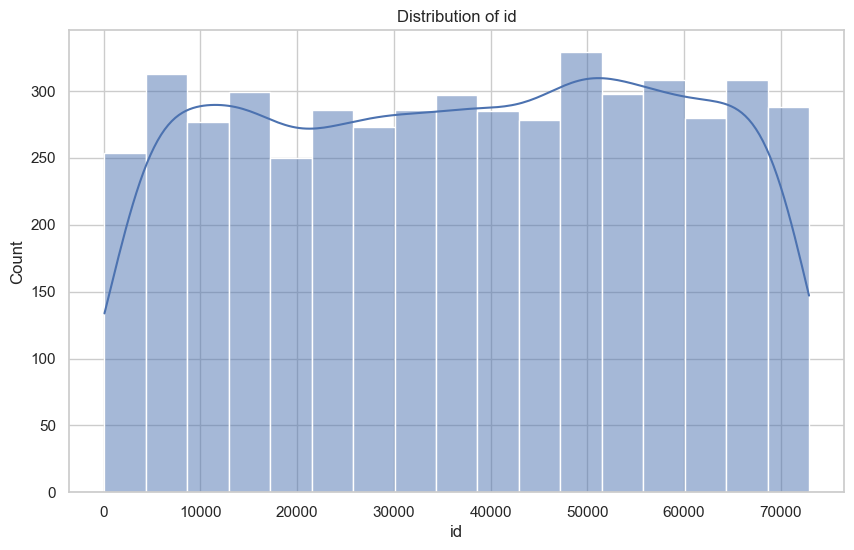

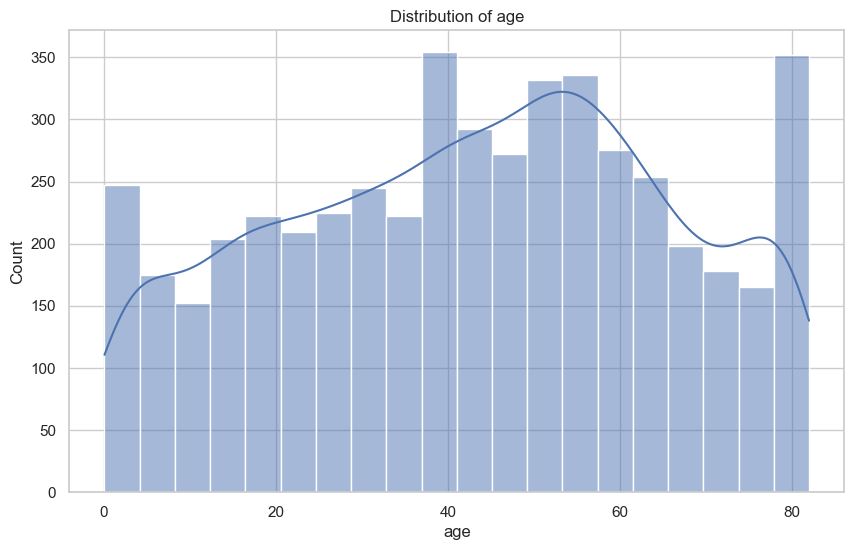

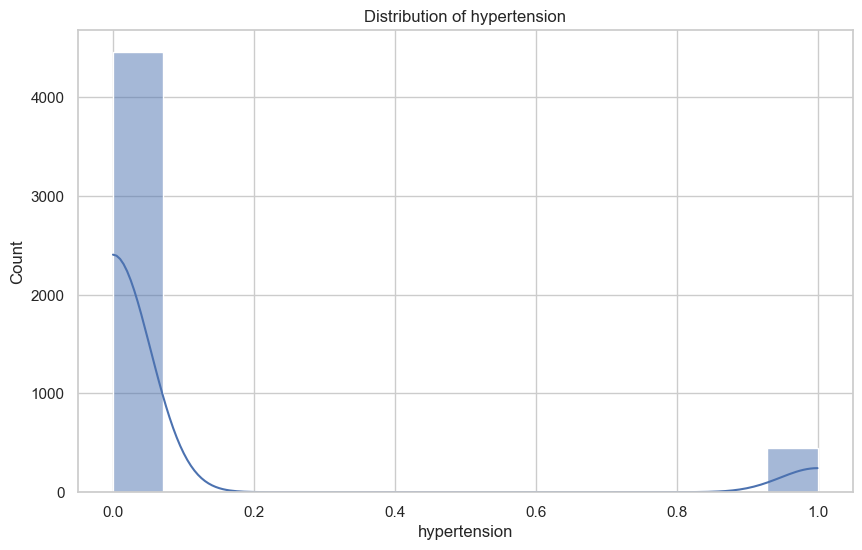

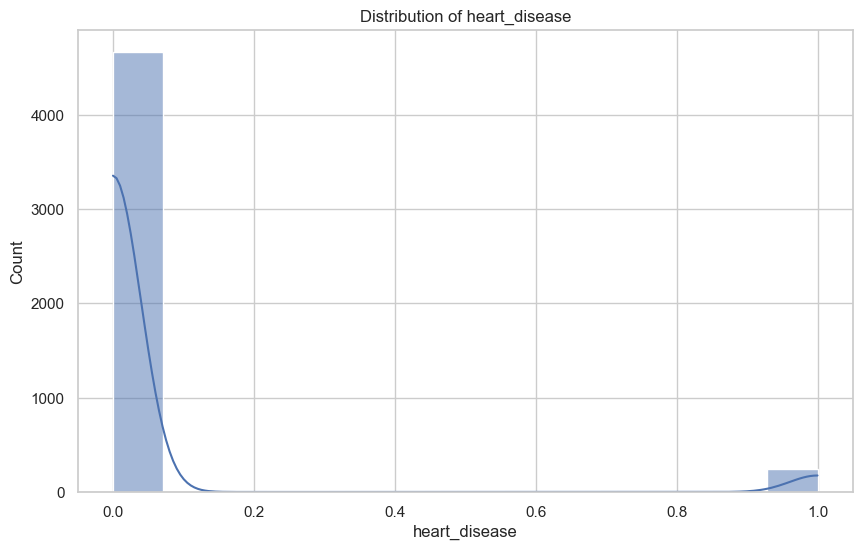

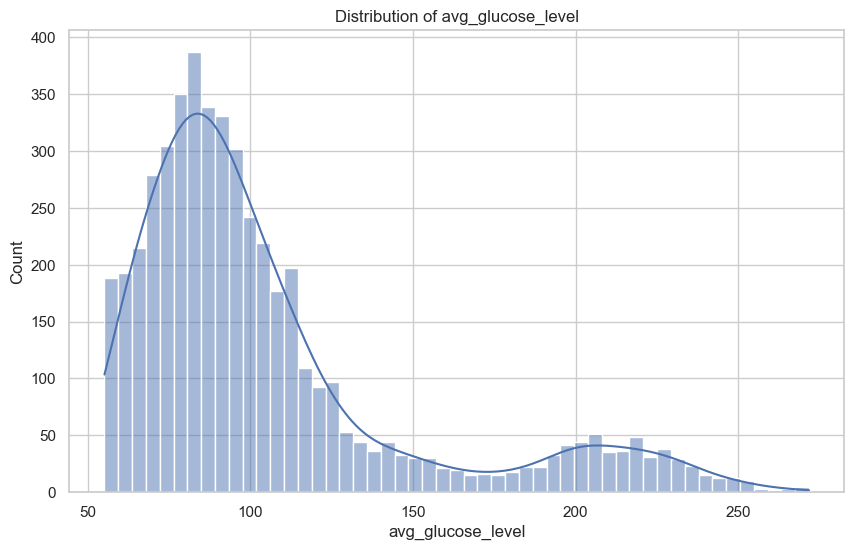

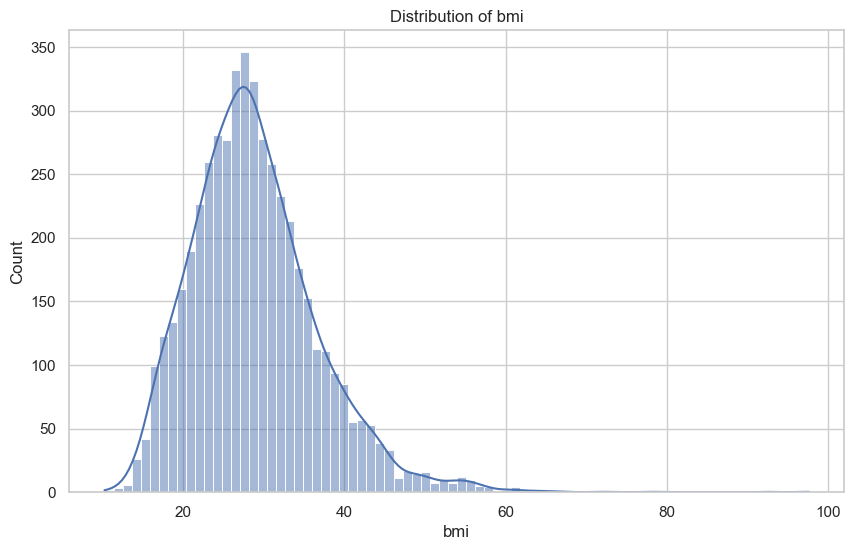

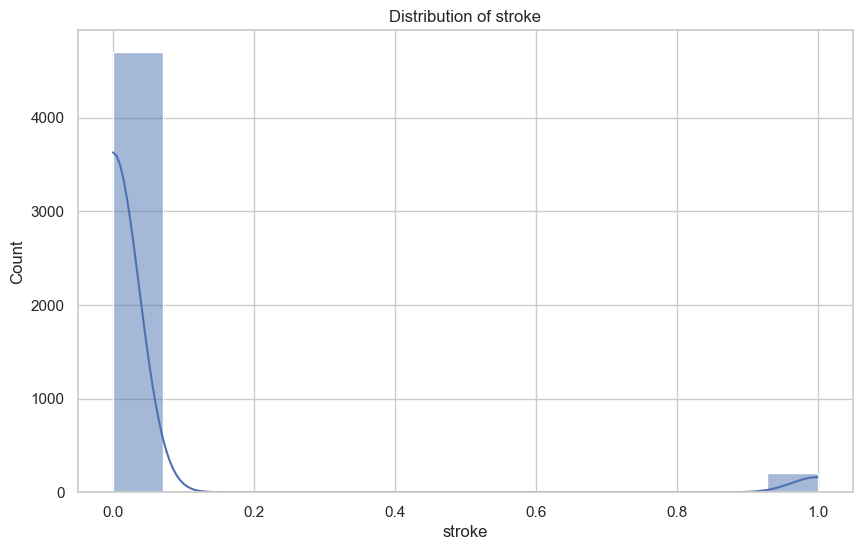

In [35]:
# 📌  Exploratory Data Analysis (EDA)
# Plotting distributions of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

<Figure size 2000x600 with 0 Axes>

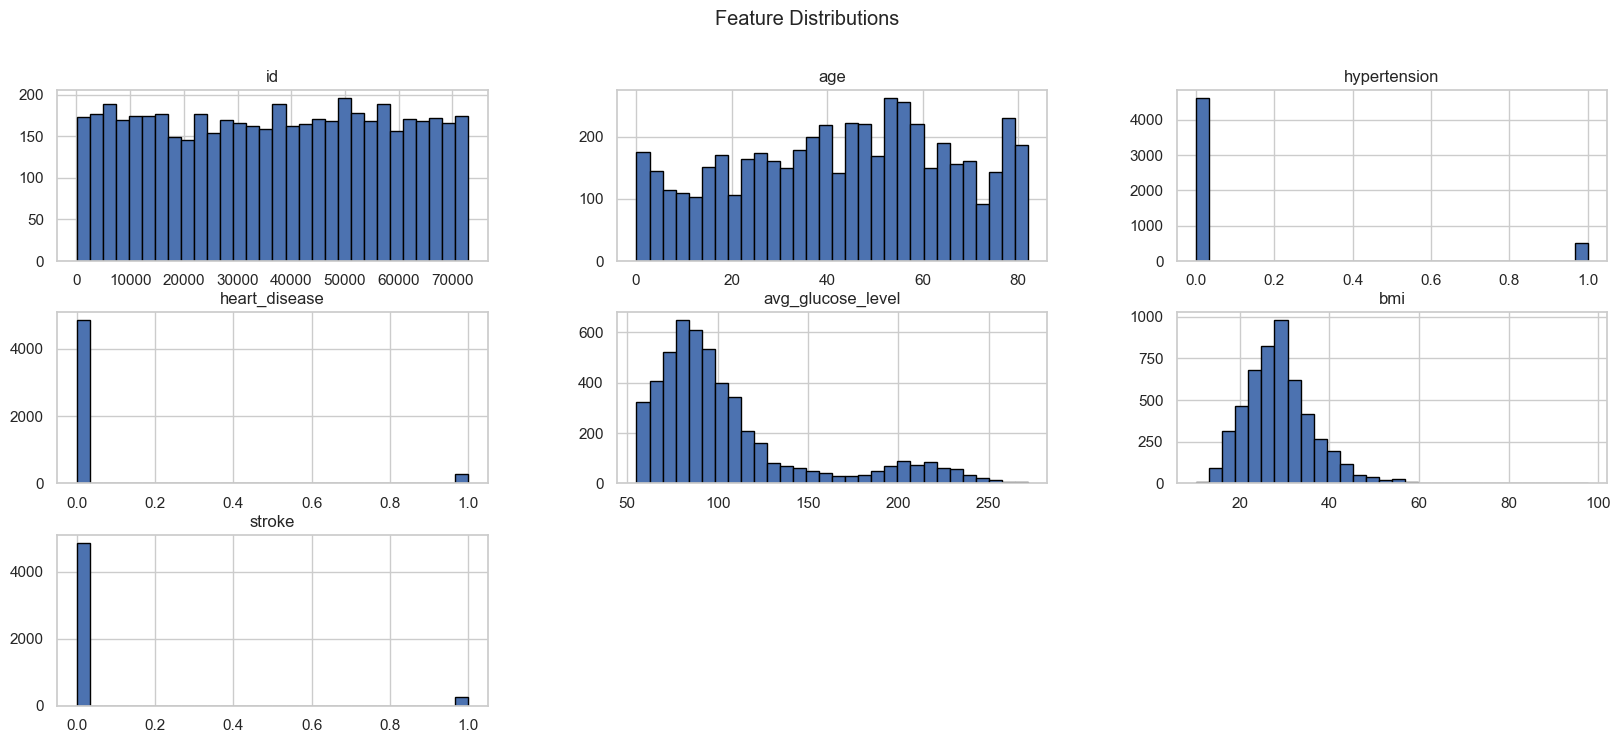

In [59]:
#EDA:Visualizing Data Distributions
plt.figure(figsize=(20,6))
df.hist(bins=30,figsize=(20,8),edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

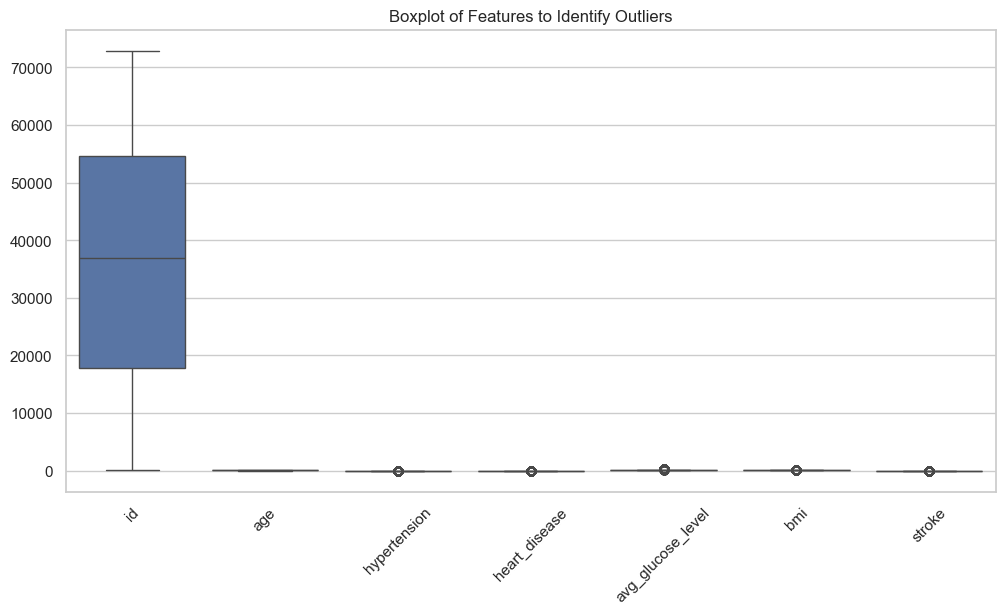

In [61]:
#finding outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of Features to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

In [63]:
Q1 = df['id'].quantile(0.25)
Q3 = df['id'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliers = df[(df['id'] < lower_bound) | (df['id'] > upper_bound)]

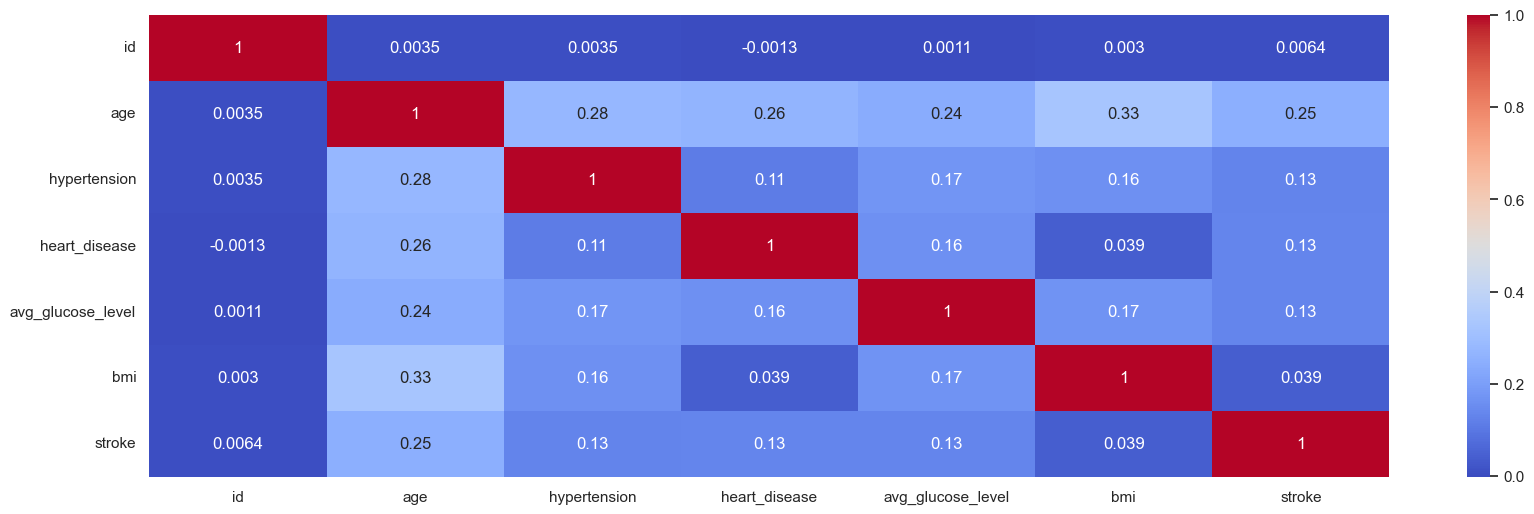

In [67]:
#Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize = (20,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.show()

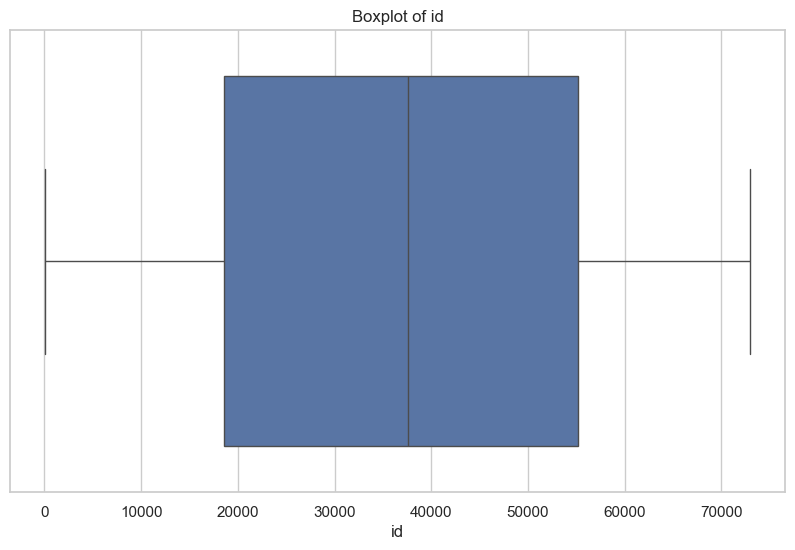

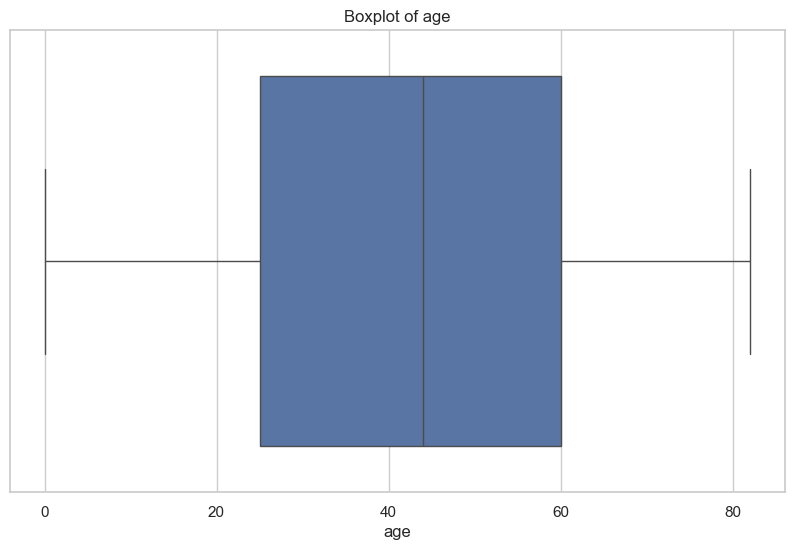

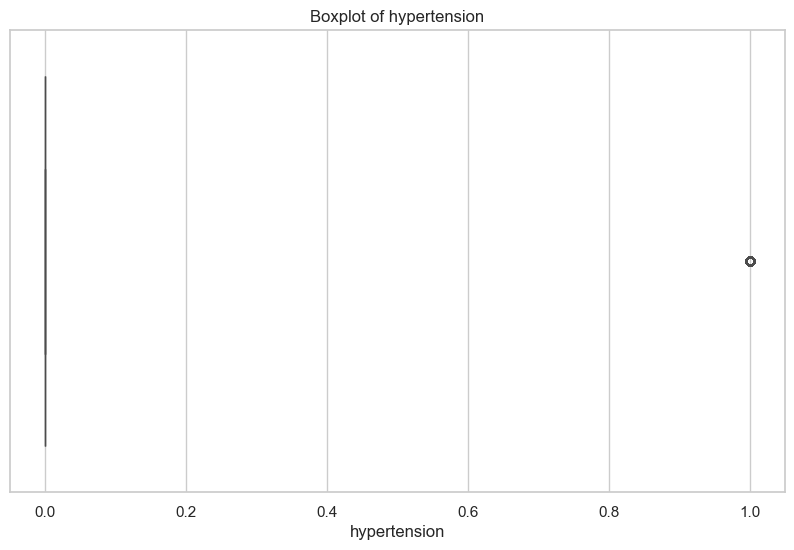

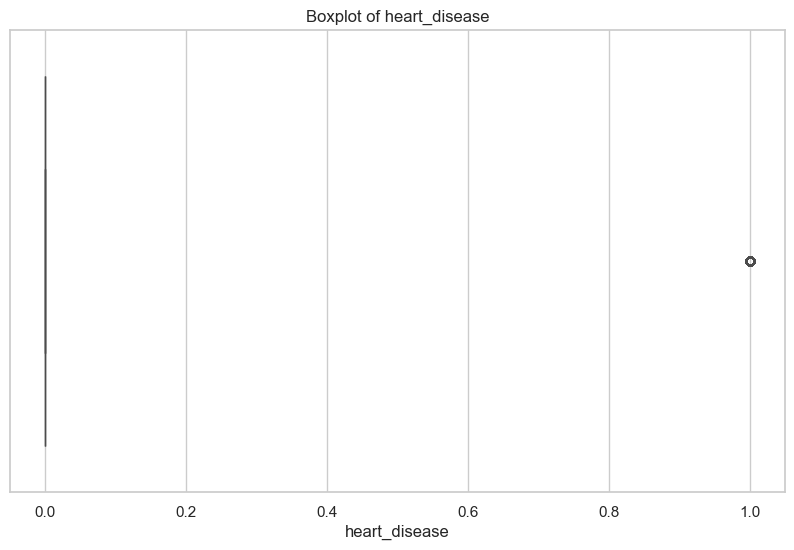

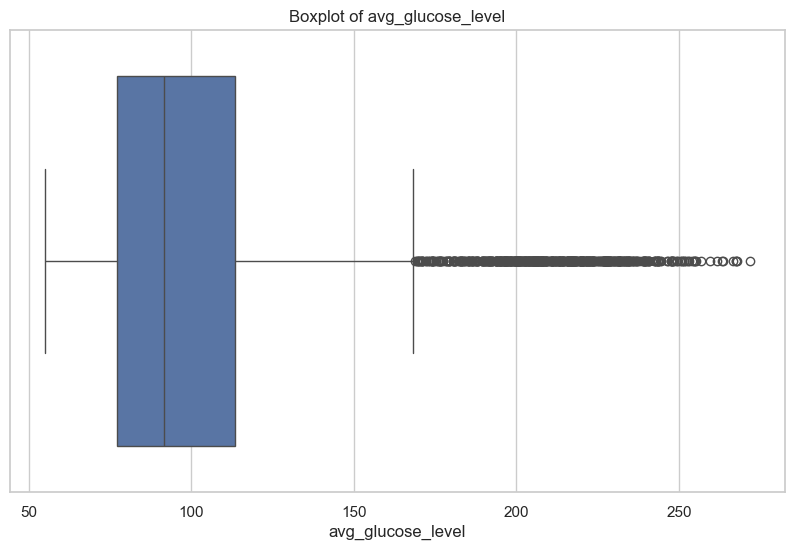

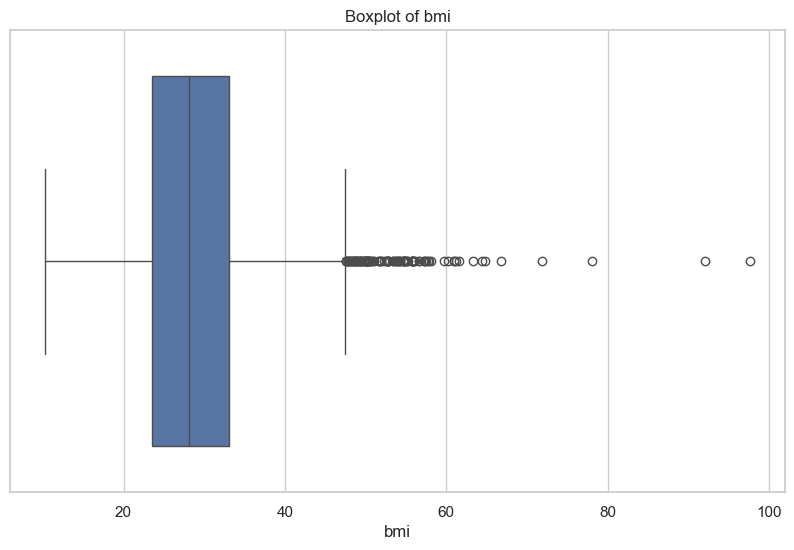

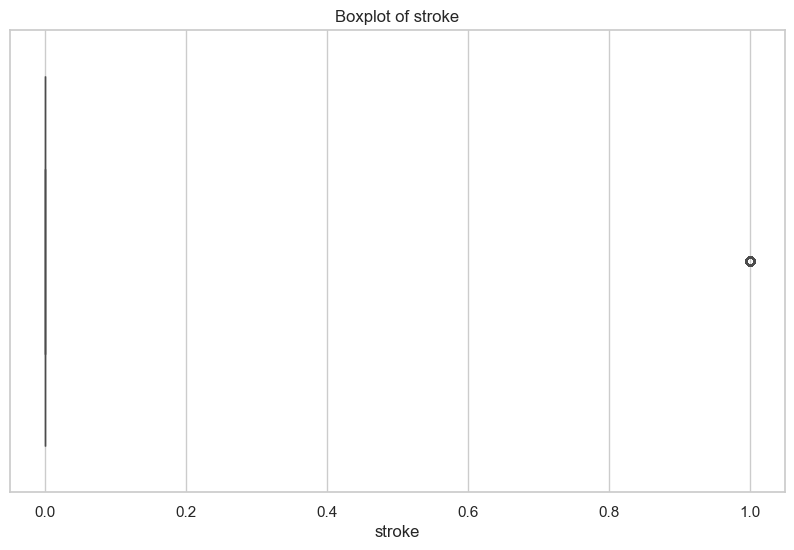

In [36]:
# Box plots for outliers
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

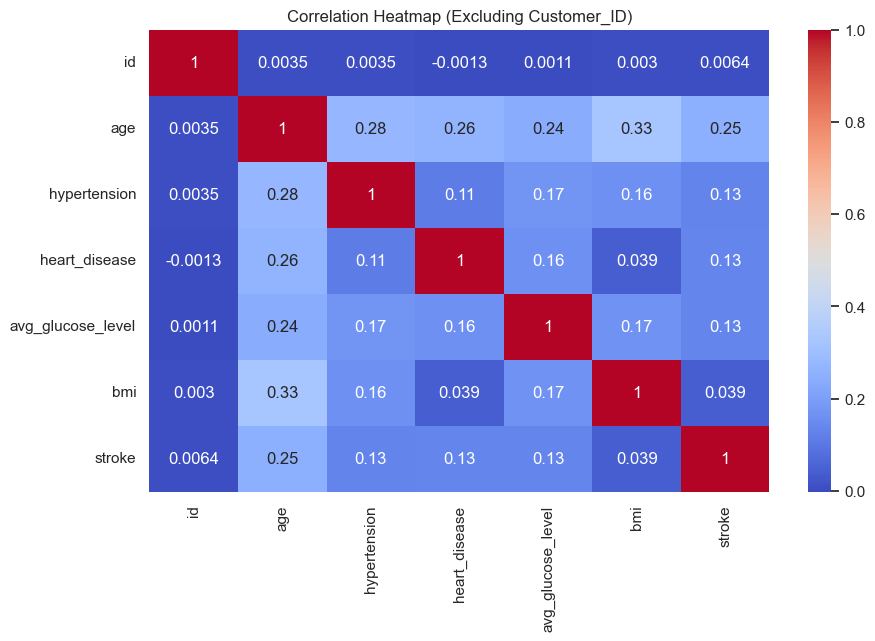

In [70]:
#  Correlation Analysis (Updated: Dropping Customer_ID)
# Drop object-type columns like 'Customer_ID' before calculating correlation
df_corr = df.drop(columns=['Customer_ID'], errors='ignore')

# Select only numeric columns
df_corr = df_corr.select_dtypes(include=np.number)

# Compute and plot correlation
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Excluding Customer_ID)")
plt.show()

## 📊 Univariate and Multivariate Analysis

### 🔹Univariate Analysis.

Univariate Analysis is a type of data visualization where we visualize only a single variable at 
a tie. It makes us to understand the distribution, central tendency, and spread of single variable in your data set. 

### 🔹 Multivariate Analysis
Multivariate analysis is an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them. It helps us to understand how multiple factors interact and influence each other in a dataset.
.

We’ll explore both types of analysis using visualizations and summary statistics for key columns li `gender','id','gender','age','hypertension',heart disease etc...
.

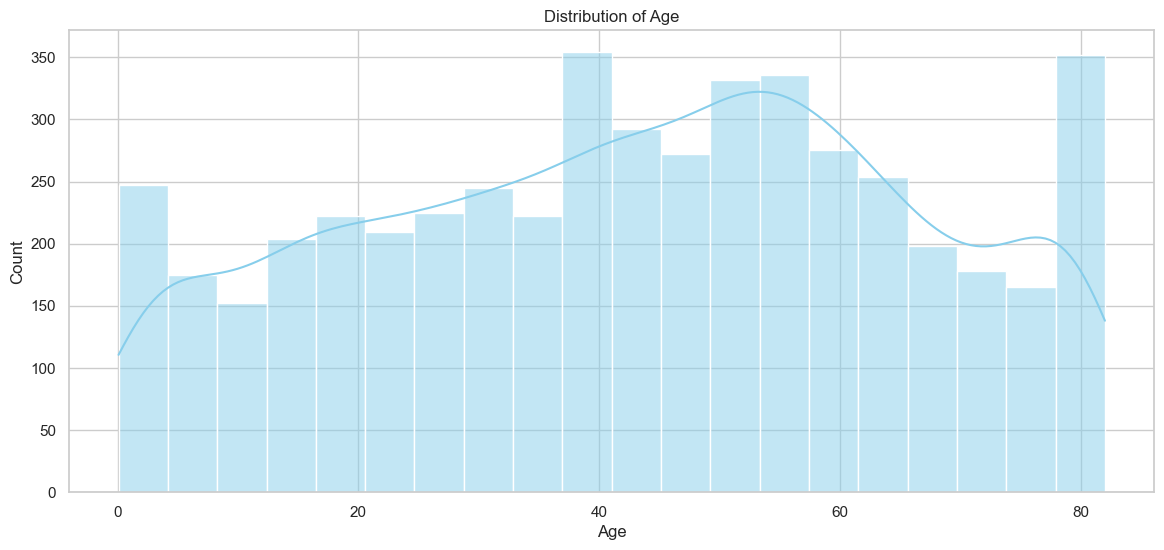

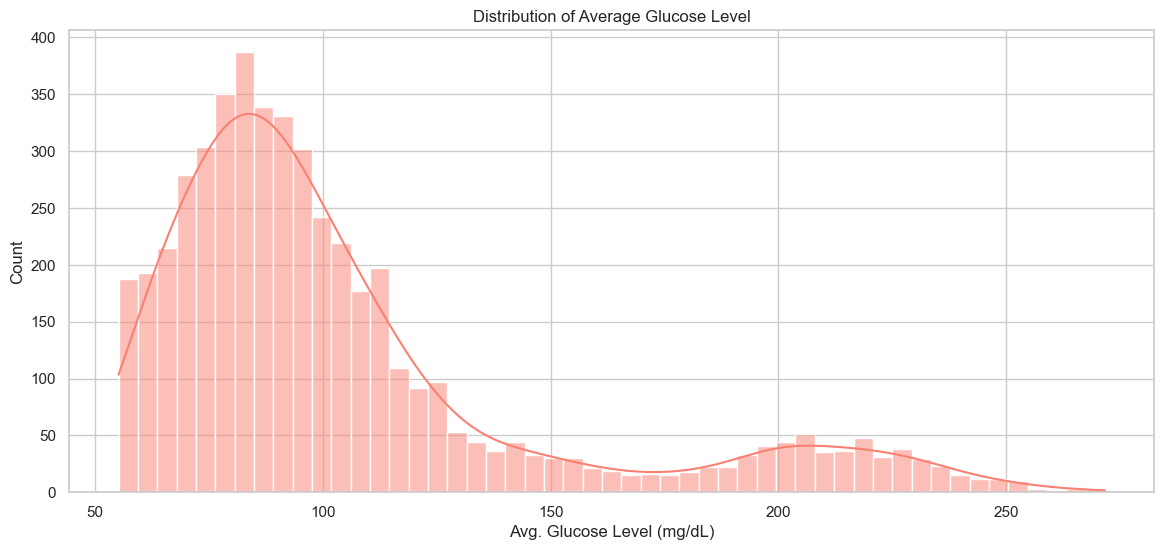

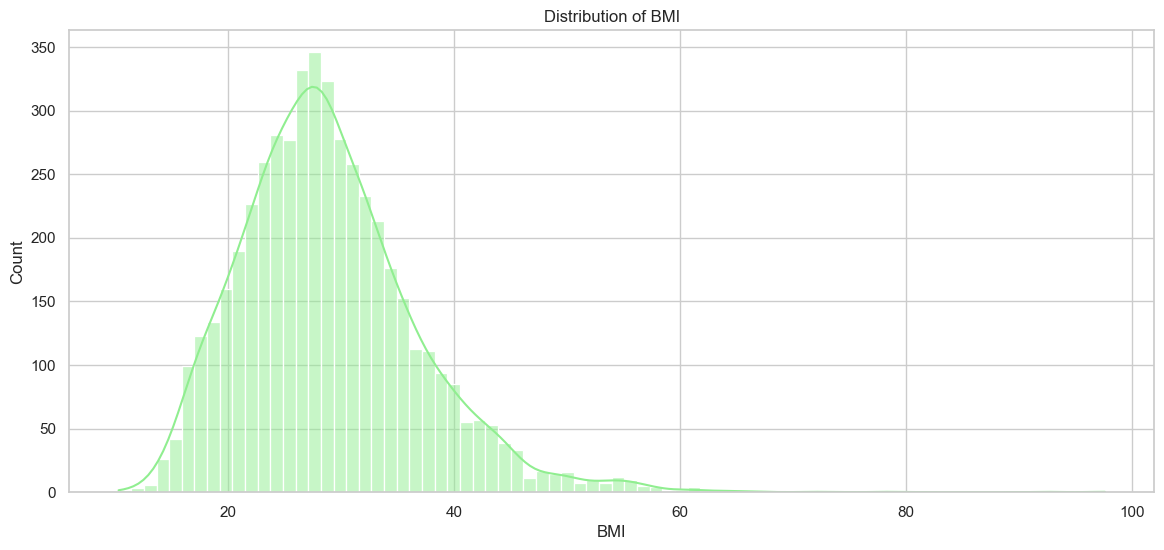

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis – Distribution plots for numeric variables
plt.figure(figsize=(14, 6))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(df['avg_glucose_level'], kde=True, color='salmon')
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Avg. Glucose Level (mg/dL)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(df['bmi'].dropna(), kde=True, color='lightgreen')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


### Univariate Analysis - 📐Categorical variable count plot

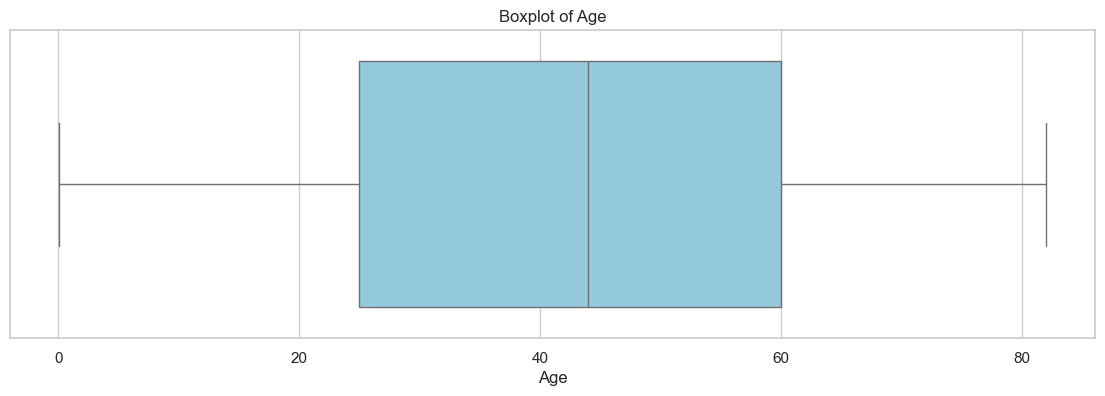

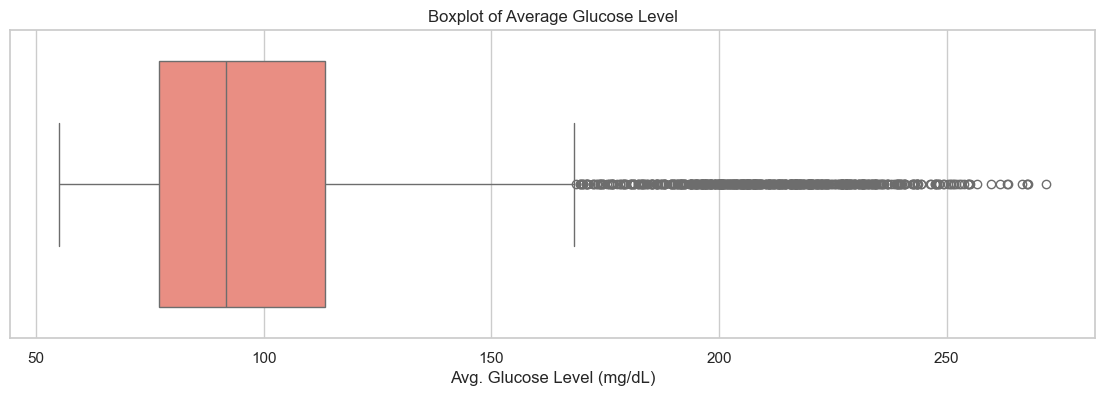

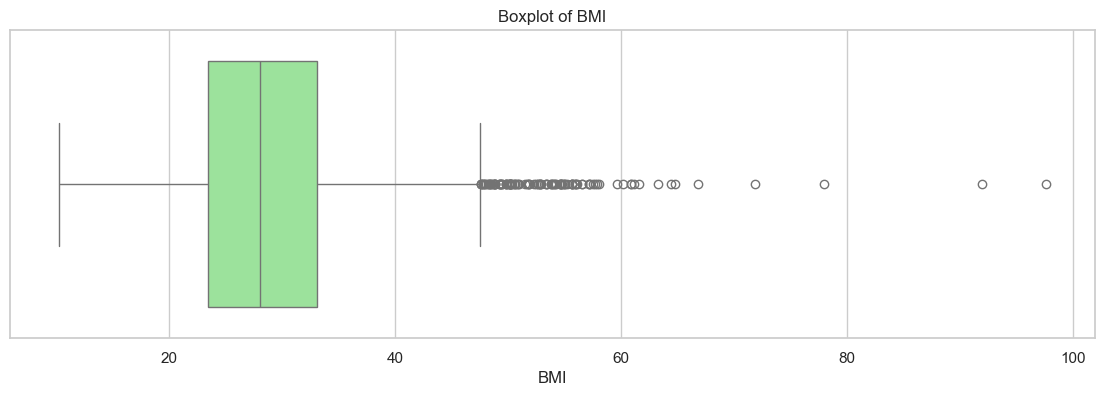

In [42]:
# Univariate Analysis – Boxplots for skew/outliers
plt.figure(figsize=(14, 4))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(14, 4))
sns.boxplot(x=df['avg_glucose_level'], color='salmon')
plt.title('Boxplot of Average Glucose Level')
plt.xlabel('Avg. Glucose Level (mg/dL)')
plt.show()

plt.figure(figsize=(14, 4))
sns.boxplot(x=df['bmi'].dropna(), color='lightgreen')
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()


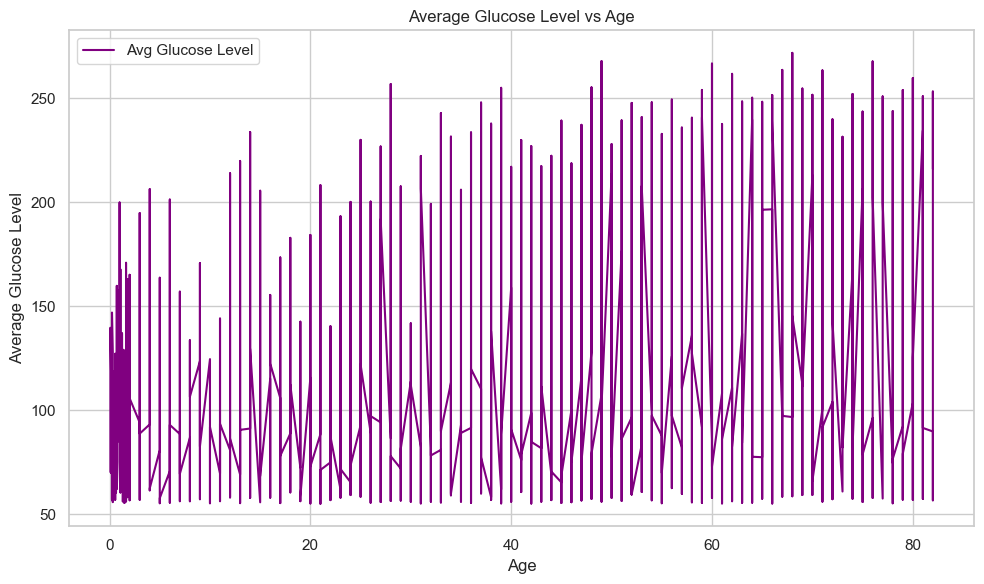

In [83]:
#Line plot
df_sorted = df.sort_values("age")
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["age"], df_sorted["avg_glucose_level"], label="Avg Glucose Level", color='purple')

plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.title("Average Glucose Level vs Age")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


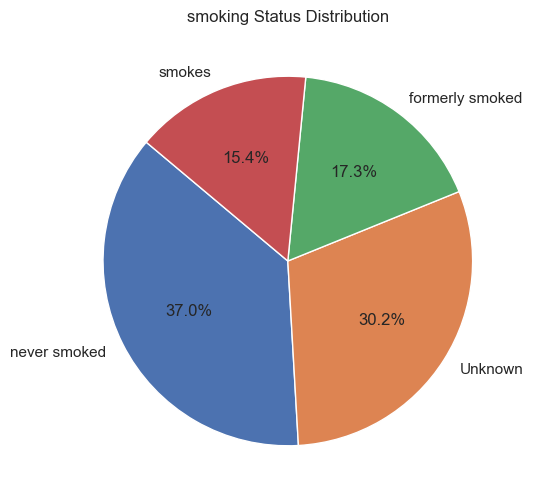

In [93]:
#pie chart
smoke_counts = df['smoking_status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoke_counts, labels=smoke_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('smoking Status Distribution')
plt.show()


<Axes: xlabel='age', ylabel='bmi'>

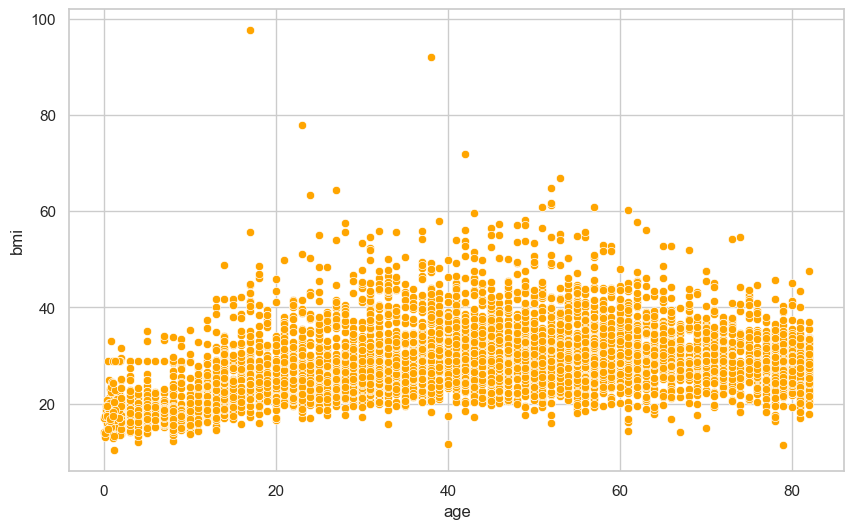

In [101]:
sns.scatterplot(x="age",y="bmi",data=df,color="orange")

## Multivariate Analysis - 🌀Pairplot of key numeric features

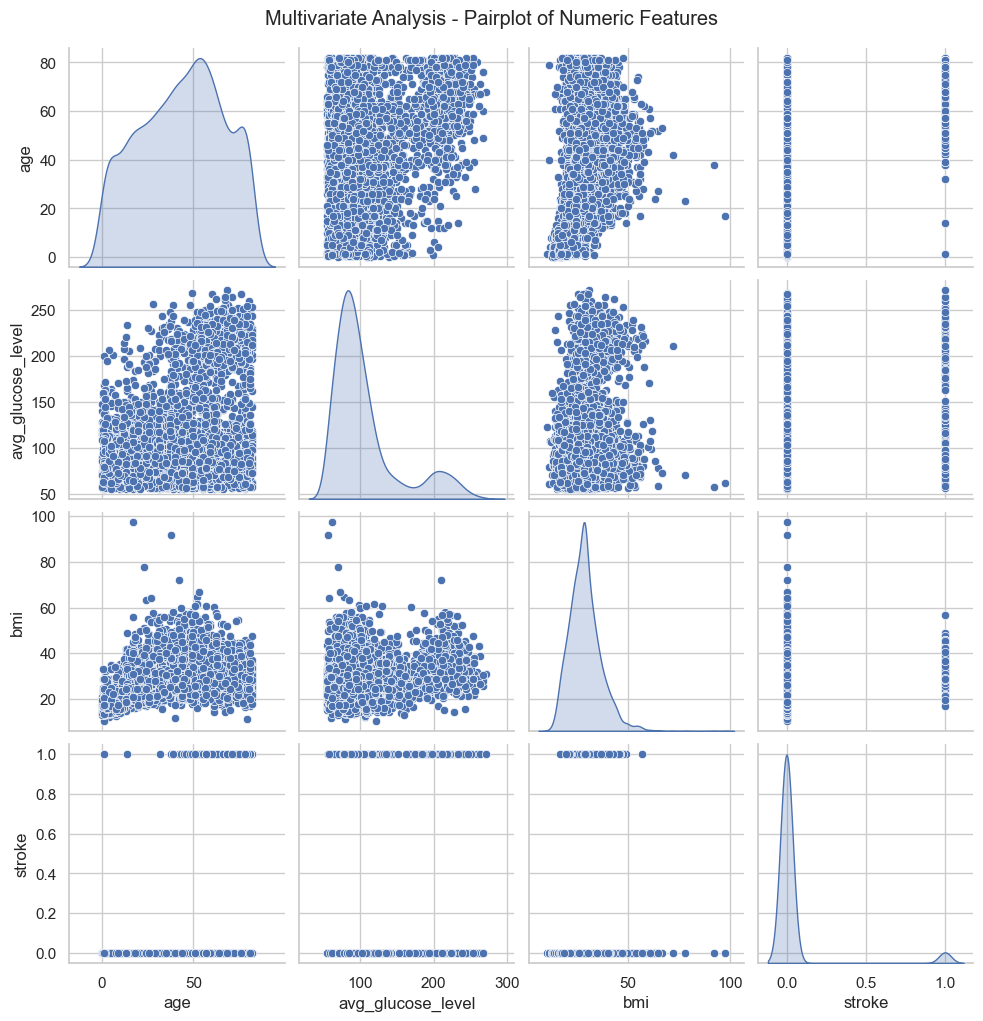

In [108]:
# Multivariate Analysis - Pairplot of key numeric features
sns.pairplot(df[['age','avg_glucose_level','bmi','stroke']], diag_kind='kde')
plt.suptitle('Multivariate Analysis - Pairplot of Numeric Features', y=1.02)
plt.show()

## Multivariate Analysis - 🔥Heatmap for correlation

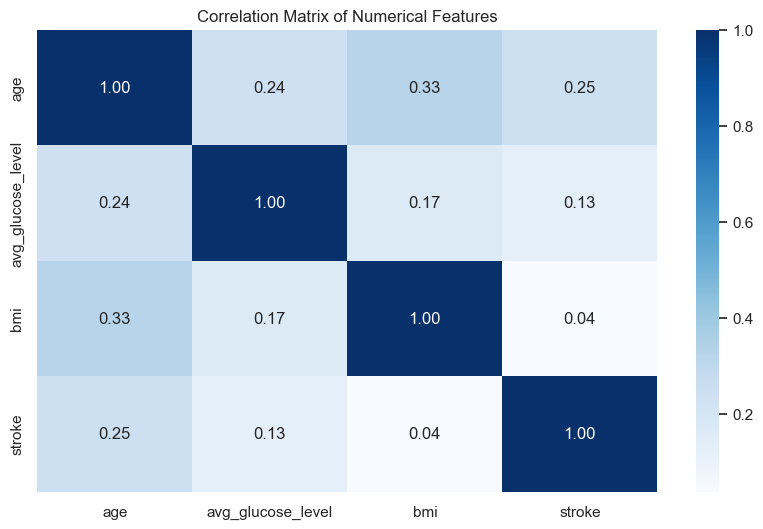

In [111]:
# Multivariate Analysis - Heatmap for correlation
plt.figure(figsize=(10, 6))
corr = df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

C:\Users\keert\AppData\Local\Temp\ipykernel_1908\4160376969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='pastel')


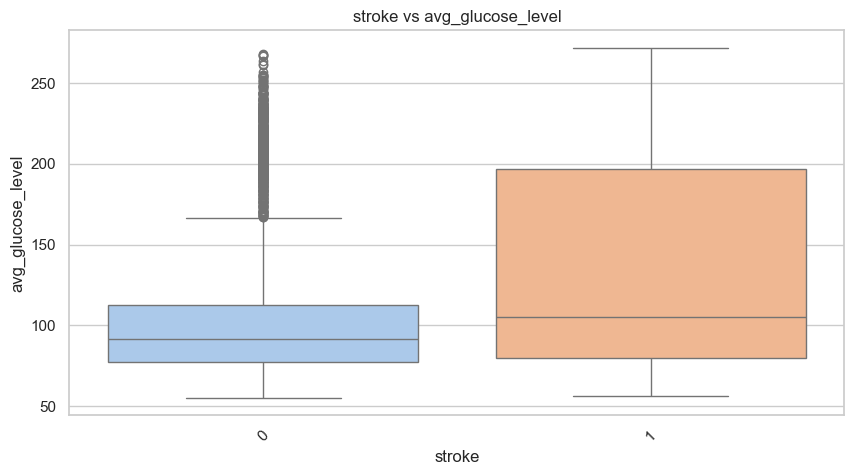

In [117]:
# Multivariate Analysis - Boxplot of Inventory level by Region (numerical and categorical)
plt.figure(figsize=(10, 5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='pastel')
plt.title('stroke vs avg_glucose_level')
plt.xticks(rotation=45)
plt.show()

#BIVARIENT ANALYSIS

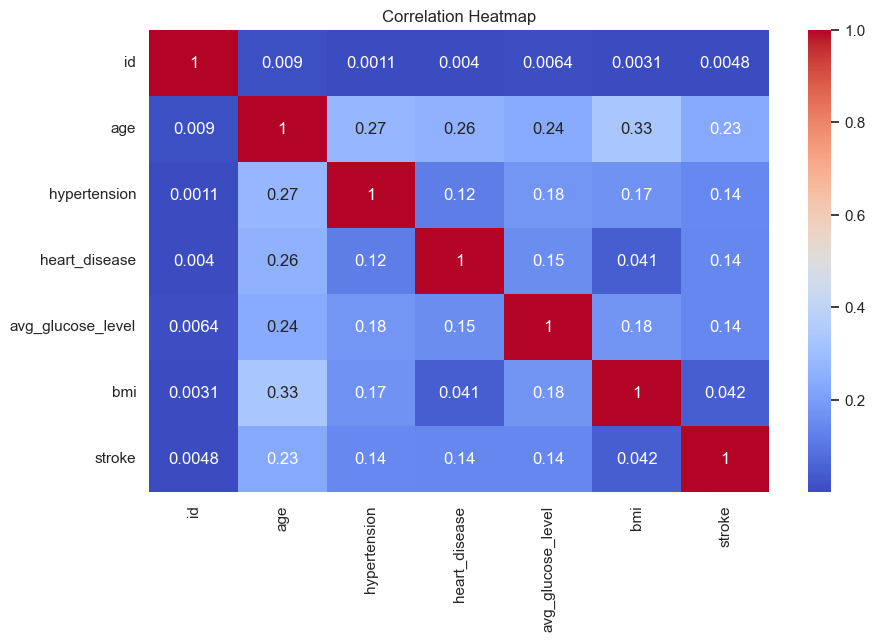

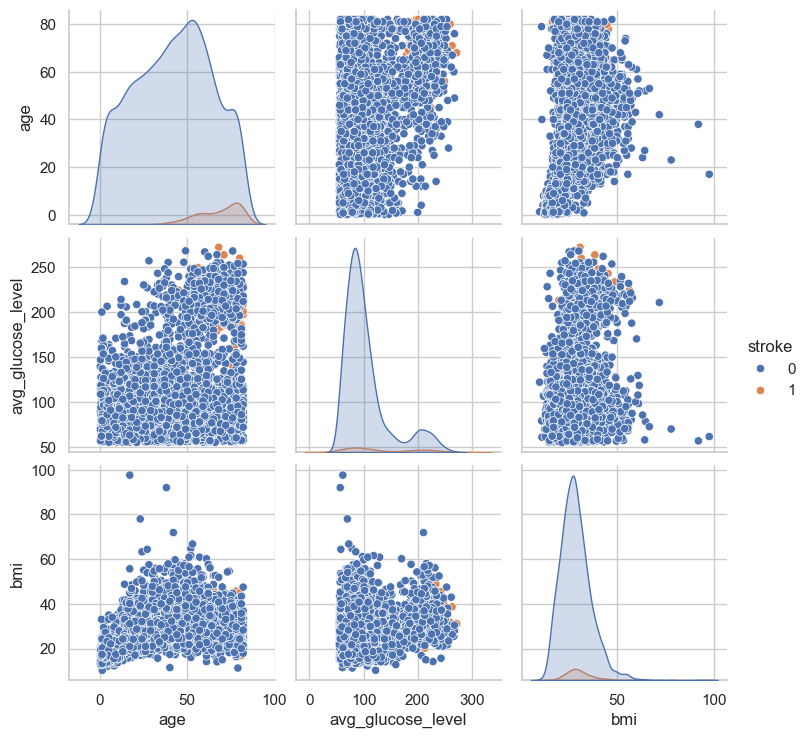

In [43]:
#  Bivariate Analysis – Heatmap & Pairplot
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')

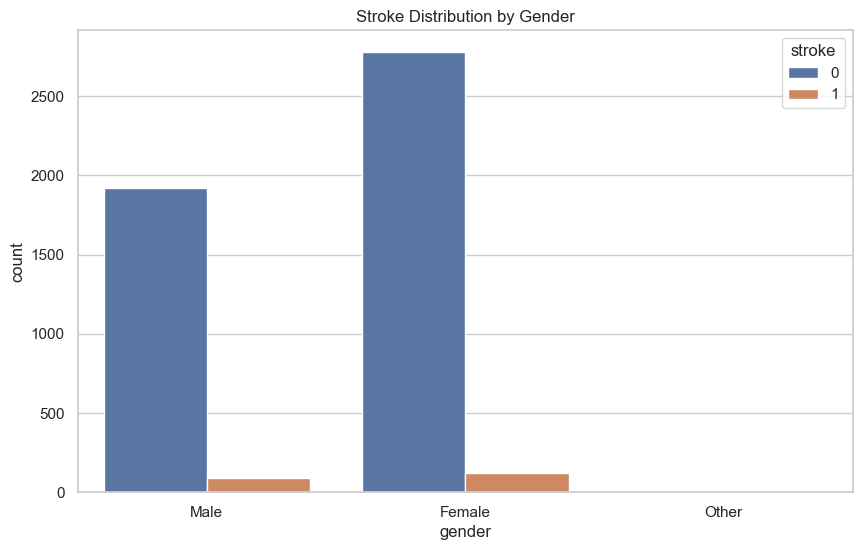

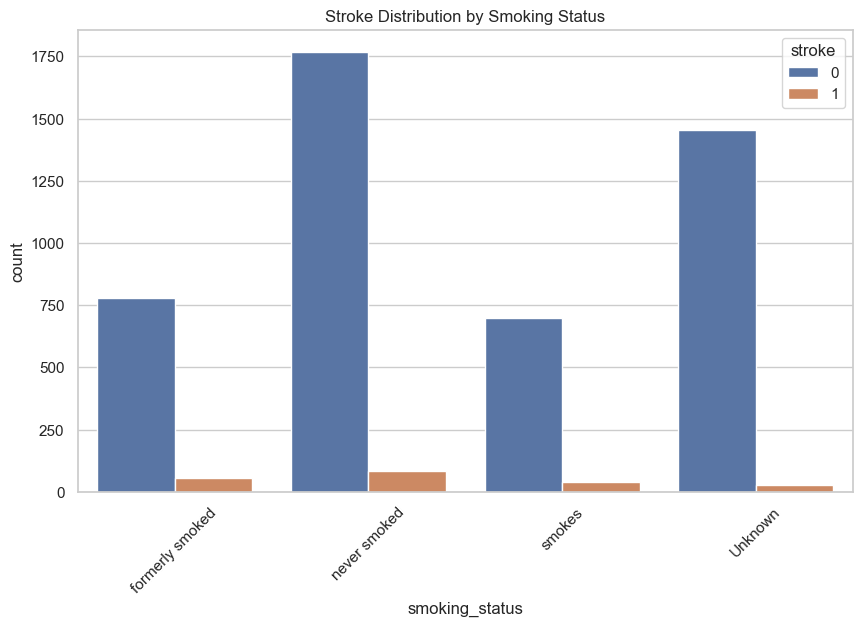

In [45]:
# Categorical Plots – Stroke distribution by category
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Distribution by Gender')
plt.show()

sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Stroke Distribution by Smoking Status')
plt.xticks(rotation=45)
plt.show()

C:\Users\keert\AppData\Local\Temp\ipykernel_20640\3795903111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='work_type', y='avg_glucose_level', data=df, palette='Set2')


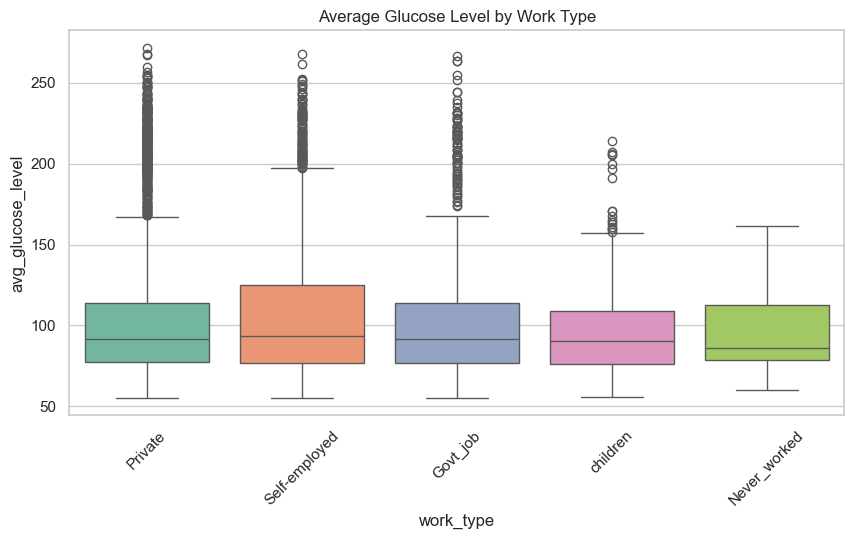

In [49]:
# Boxplot of Avg Glucose Level by Work Type (instead of Region)
plt.figure(figsize=(10, 5))
sns.boxplot(x='work_type', y='avg_glucose_level', data=df, palette='Set2')
plt.title('Average Glucose Level by Work Type')
plt.xticks(rotation=45)
plt.show()


## 🧮Probability Distribution Analysis

By analysing histogram, KDE(Kernel density estimation)plots and normal distribution. We gain insights into the behaviour of important numerical metrics in the retail inventory dataset

### 🔖Columns Chosen:
- age:shows how age is distributed among the patients
- avg_glucose_level:indicates glucose distribution usfull for identifying diabetic patients
- bmi:distribution of body mass index can help reveal obesity trends

Each variable is visualized below with both histogram and normal distribution fit.


In [122]:
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm, ttest_ind, chi2_contingency

In [126]:
# Set the style for all plots
sns.set(style="white")

# Columns selected for probability distribution
columns_to_examine = ['age','avg_glucose_level','bmi']
columns_to_examine

['age', 'avg_glucose_level', 'bmi']

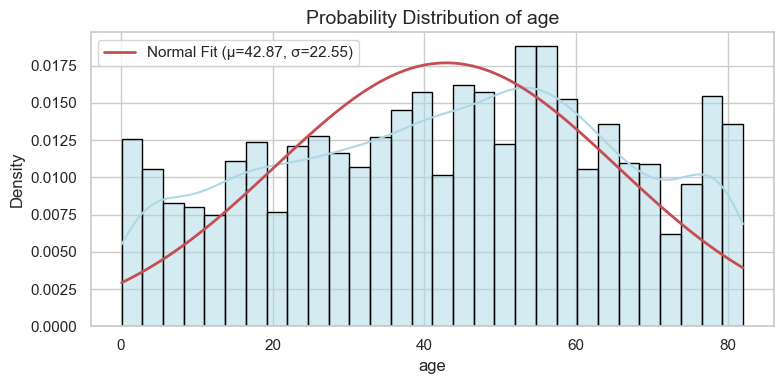

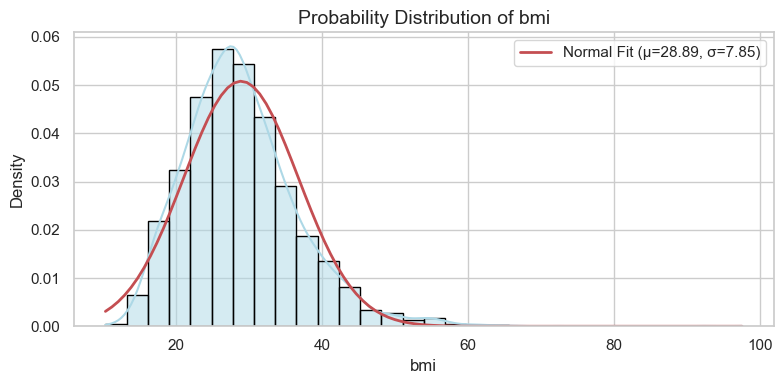

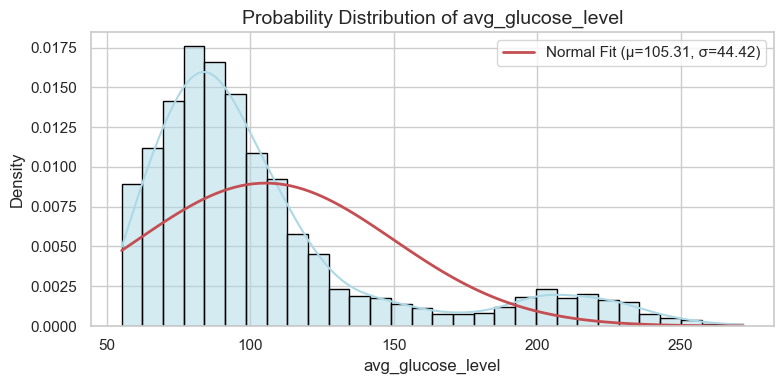

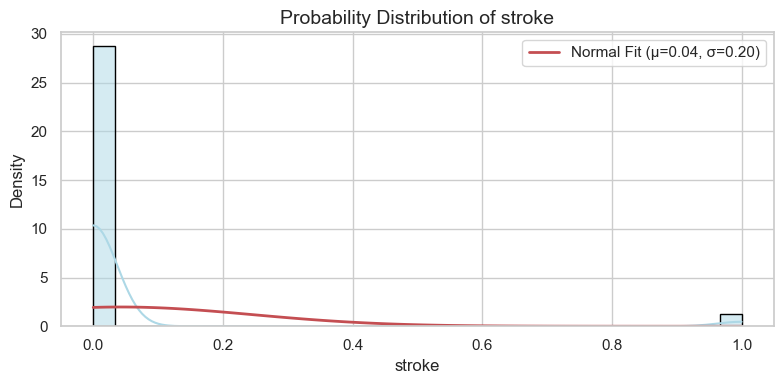

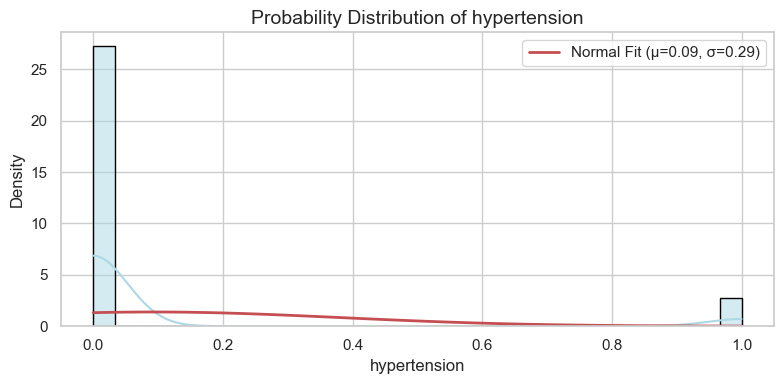

In [50]:
# Set the style for all plots
sns.set(style="whitegrid")

# Columns selected for probability distribution
columns_to_analyze = ['age', 'bmi', 'avg_glucose_level', 'stroke', 'hypertension']

# Plotting histogram with KDE and normal distribution fit
for col in columns_to_analyze:
    plt.figure(figsize=(8, 4))
    
    # Plot histogram and KDE
    sns.histplot(df[col], kde=True, stat="density", bins=30, color="lightblue", edgecolor="black")
    
    # Fit normal distribution to the data
    mean, std = norm.fit(df[col])
    x = np.linspace(df[col].min(), df[col].max(), 100)
    p = norm.pdf(x, mean, std)
    
    # Plot fitted normal distribution
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Fit (μ={mean:.2f}, σ={std:.2f})')
    
    # Titles and labels
    plt.title(f'Probability Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


## 📝Hypothesis Testing
   by doing t-Test, chi-square test that helps us to make data-driven decisions by Statistically evaluating patterns assumptions and differences in data.

In [51]:
#. Hypothesis Testing – t-test (example: glucose level vs stroke)
stroke_group = df[df['stroke'] == 1]['avg_glucose_level']
no_stroke_group = df[df['stroke'] == 0]['avg_glucose_level']
t_stat, p_val = ttest_ind(stroke_group, no_stroke_group)
print("T-statistic:", t_stat, "P-value:", p_val)

T-statistic: 9.827770450292483 P-value: 1.3799691107259876e-22


In [129]:
# Hypothesis Testing for Stroke Analysis
# Choose two groups: stroke and non-stroke
stroke_group = df[df['stroke'] == 1]['avg_glucose_level']
non_stroke_group = df[df['stroke'] == 0]['avg_glucose_level']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(stroke_group, non_stroke_group, equal_var=False)

print("T-Statistic:", round(t_stat, 2))
print("P-Value:", round(p_value, 4))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: Stroke status significantly affects glucose levels.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in glucose levels.")



T-Statistic: 6.98
P-Value: 0.0
Reject Null Hypothesis: Stroke status significantly affects glucose levels.


## Simple Linear Regression
We predict `Discount` using `Units Sold` to understand how discount affects on sales Performance.


In [138]:
# Simple Linear Regression (Example)

# Independent (X) and dependent (y) variables
X = df[['avg_glucose_level']]  # must be 2D for sklearn
y = df['stroke']

# Create and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [142]:
#Simple Linear Regression (Example)
# Stroke Linear Regression Example
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Independent and dependent variables
X = df[['avg_glucose_level']]   # Make sure it's 2D
y = df['stroke']                # Binary classification target

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)



In [54]:
# Predict values
y_pred = lin_reg.predict(X)

In [56]:
y_pred

array([32.72164249, 28.91231459, 30.93876409, ..., 28.20083875,
       30.78548495, 28.27189325])

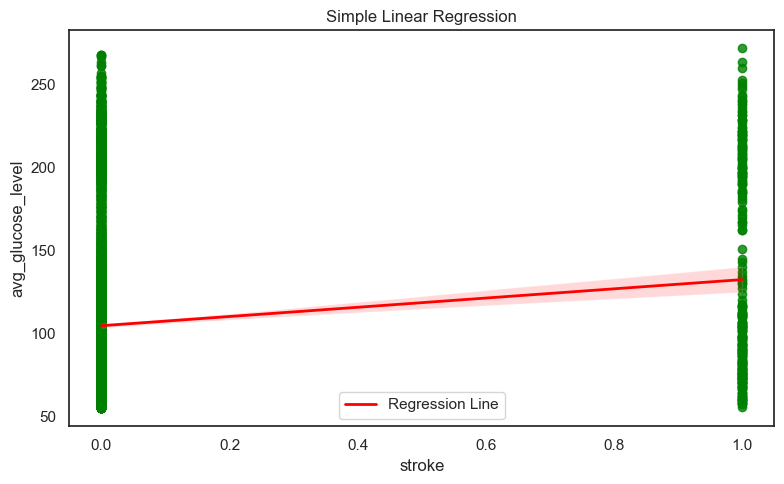

In [146]:
# Plotting Regression Line (using regplot)
plt.figure(figsize=(8, 5))
sns.regplot(x='stroke', y='avg_glucose_level', data=df, scatter_kws={'color': 'green', 'label': 'Actual'}, line_kws={'color': 'red', 'linewidth': 2, 'label': 'Regression Line'})
plt.xlabel('stroke')
plt.ylabel('avg_glucose_level')
plt.title('Simple Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
# Display coefficients
print("Intercept:", lin_reg.intercept_)
print("Slope:", lin_reg.coef_[0])

Intercept: 25.62581127839608
Slope: 0.031028165687352324


## Multiple Linear Regression
We now use three variables to predict `Units Sold` to improve our prediction accuracy and capture more in sales perfromance.


In [151]:
#Multiple Linear Regression (Example)
# Define features and target
variables = ['age','bmi','stroke']
X = df[variables]
y = df['avg_glucose_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model_mul = LinearRegression()
model_mul.fit(X_train, y_train)

LinearRegression()

In [153]:
# Predict
y_pred = model_mul.predict(X_test)
y_pred

array([ 97.2778645 , 104.03657809,  88.01513959, ..., 108.83042931,
       108.17897453, 118.21895756])

In [155]:
# Evaluation metrics
print("Intercept:", model_mul.intercept_)
print("Coefficients:", dict(zip(variables, model_mul.coef_)))
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Intercept: 71.08466961193866
Coefficients: {'age': 0.3893789199450078, 'bmi': 0.6140194941370162, 'stroke': 15.990291709182983}
R-squared: 0.06653469175426863
RMSE: 42.36638902036853


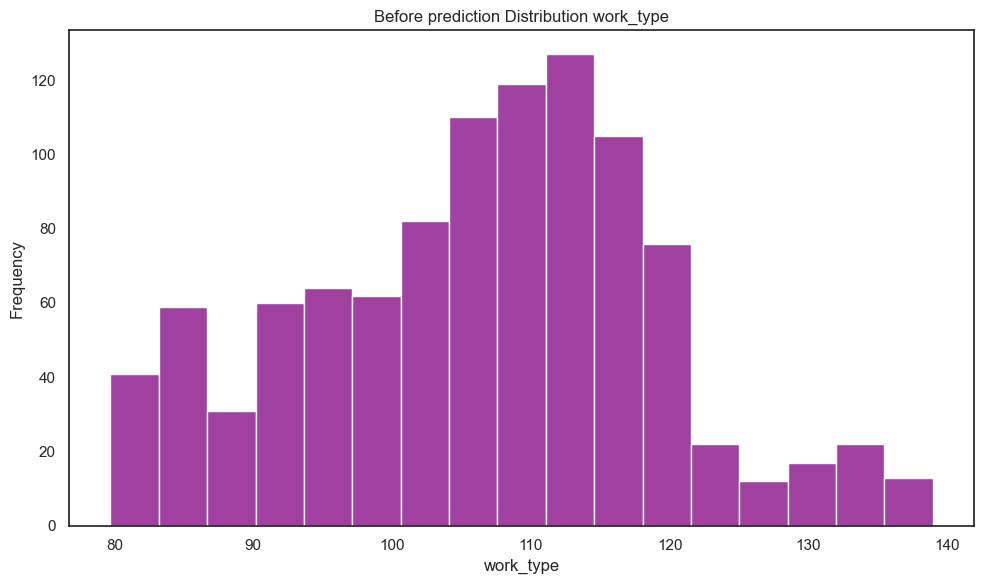

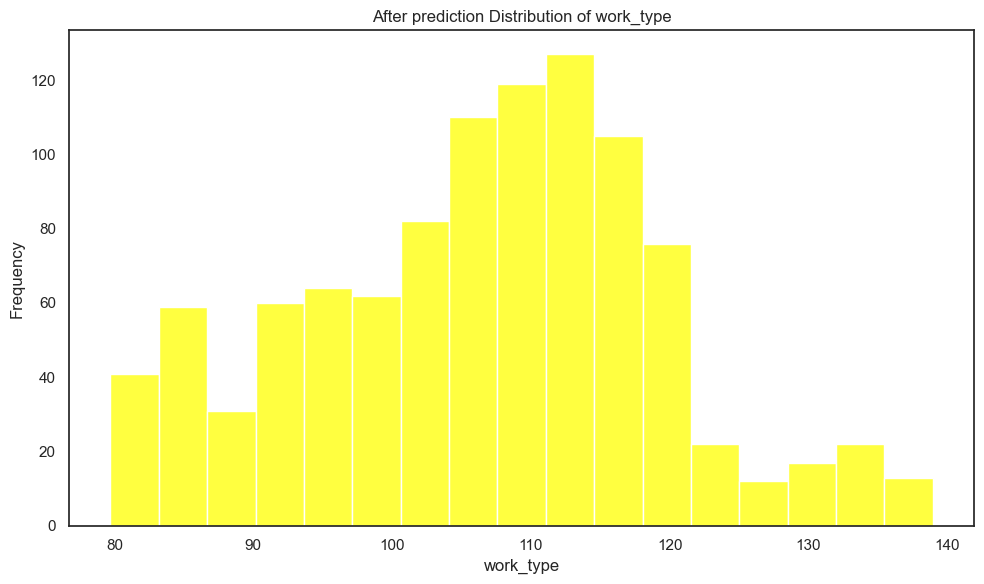

In [163]:
sns.histplot(y_pred,color="purple")
plt.title("Before prediction Distribution work_type")
plt.xlabel("work_type")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

sns.histplot(y_pred,color="yellow")
plt.title("After prediction Distribution of work_type")
plt.xlabel("work_type")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [60]:
# Define features and target
features = ['age', 'bmi', 'avg_glucose_level']  # Replace these with relevant feature names
X = df[features]
y = df['stroke']  # Target variable (e.g., Stroke Probability)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Print the model coefficients (optional, but useful for interpretation)
print("Intercept:", mlr.intercept_)
print("Coefficients:", mlr.coef_)

# Predict on the test set
y_pred = mlr.predict(X_test)

# You can now evaluate the model performance using metrics like R-squared, Mean Squared Error, etc.
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Intercept: -0.052851196460844546
Coefficients: [ 0.00187042 -0.00124374  0.00046016]
Mean Squared Error: 0.04775721222840844
R-squared: 0.06465816510047828


In [62]:
# Predict
y_pred = mlr.predict(X_test)

In [64]:
y_pred

array([ 1.13530425e-01,  2.53201760e-02,  6.51383869e-02,  1.50546320e-02,
        4.81669449e-02,  8.64777182e-02, -2.16494820e-02,  4.39572686e-02,
        5.57326473e-02,  4.40100940e-02,  9.40068054e-02,  8.28594564e-02,
        2.56883140e-02, -2.86257595e-02,  9.15372459e-02,  1.06573126e-01,
       -7.47249000e-03,  4.74922501e-02,  6.32065143e-02,  3.96911178e-02,
        3.98279512e-02,  1.48275425e-02,  1.47385582e-01,  3.40427744e-02,
        5.11970864e-02,  1.25306091e-01,  5.27293581e-02, -3.44169211e-02,
        4.55432420e-04,  4.46522334e-02,  4.78040157e-02, -3.28955492e-02,
        2.52322052e-02, -1.62162378e-02,  2.82043662e-02,  6.76633538e-02,
        8.26231021e-02,  1.13652417e-02, -2.52222272e-03,  9.89001707e-02,
        3.68323357e-02,  2.14590936e-02, -3.34187102e-02,  5.63788461e-02,
       -2.51899891e-02,  7.48668148e-02,  7.86265849e-03, -8.15757148e-03,
        9.49783583e-02,  5.58545928e-02, -1.68398396e-02,  7.73420843e-02,
       -2.19199056e-02,  

## Hypothesis Testing
We perform a t-test to see if there's a significant difference in the `hypertension and stroke` of retail inventory from disount

In [1]:
# Choose two groups: with and without hypertension
with_hypertension = df[df['Hypertension'] == 1]['Stroke']
without_hypertension = df[df['Hypertension'] == 0]['Stroke']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(with_hypertension, without_hypertension)

# Display the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject Null Hypothesis: Hypertension significantly affects the likelihood of having a stroke.")
else:
    print("Fail to Reject Null Hypothesis: No significant differences between groups.")


T-Statistic: 4.000000000000001
P-Value: 0.003949772803445319
Reject Null Hypothesis: Hypertension significantly affects the likelihood of having a stroke.


## 📏 Model Evaluation

We evaluated the models using the following techniques:

R-squared: Measures how well the regression model explains the variation in the dependent variable, indicating the goodness of fit.

P-values: Determines the statistical significance of each predictor variable.

### 🔹 Interpretation:
-The Simple Linear and Multiple Regression models were used to identify how Age, BMI, Hypertension, Heart Disease, and Glucose Level affect the occurrence of Stroke or other outcomes.


## 🔰Final Conclusion

This project focuses on Data-Driven Insights into Stroke Prediction and Analysis using Statistical Models. The goal is to identify factors that contribute to the likelihood of having a stroke and provide meaningful conclusions that can inform healthcare decisions.


### 📍Key Takeaways:
Descriptive Statistics: These statistics provide an understanding of stroke patients' demographics and health metrics by summarizing data like Age, BMI, Glucose Levels, and Hypertension. These insights offer a snapshot of factors associated with strokes.

Probability Distributions: The distribution of variables like Age, BMI, and Glucose Level were explored using histograms, allowing us to identify patterns that could influence the model.

Simple & Multiple Linear Regression Models: These models demonstrated how variables such as BMI, Age, and Glucose Levels might predict stroke occurrence or severity. The models showed the influence of these variables with R-squared values indicating how well the models fit the data.

Hypothesis Testing: We tested for significant differences in variables like Glucose Levels between stroke and non-stroke groups, revealing key predictors of stroke risk.

Correlation Analysis: Conducted on numerical variables like Age, BMI, Glucose Levels, and Hypertension, revealing correlations between these variables. The analysis supported data-driven decision-making, avoiding multicollinearity in the regression models, and ensuring the accuracy of predictive models.



### 📈Business Interpretation:

Age and BMI: These factors significantly contribute to stroke prediction. This suggests that age and body mass index should be monitored in healthcare settings to identify potential stroke risks early.

Glucose Levels: Elevated glucose levels may indicate a higher risk of stroke, reinforcing the importance of managing blood sugar levels, particularly in diabetic patients.

Hypertension and Heart Disease: Both these conditions are shown to have strong associations with stroke occurrence, pointing to the need for better management of these health conditions to reduce stroke risk.

Stroke Prediction: Understanding which factors predict stroke occurrence allows healthcare providers to focus on high-risk groups and take preventive measures.

By applying statistical analysis to this dataset, we can turn raw data into actionable insights for improving healthcare outcomes and reducing stroke incidents.



### ✅Final Verdict:
This stroke analysis dataset offers strong potential for statistical insights into stroke prediction and risk factors. By combining exploratory and predictive analysis, it empowers healthcare professionals to make informed decisions in stroke prevention and management, driving long-term improvements in public health and reducing stroke incidence.


THANK YOU!!!